### Lab Description
In this lab, you will prepare your dataset for Machine Learning models. Go back to Lab 1 - Part a, if any of the answers were wrong, find out why and try to fix your code. We will continue on the same dataset. Tasks you should perform are as follow: 
- data imputation
- data transformation

### Lab Tasks
- Replace each of the below columns with a numerical column in this dataset. 
- Drop the following columns form the dataset: 
```Python
['workclass', 'education', 'occupation', 'native-country']```

### Lab Questions
1. What would be a meaningful data transformation for column ``education``?
2. What would be a meaningful data transformation for column ``marital-status``?
3. What would be a meaningful data transformation for column ``relationship``?
4. What would be a meaningful data transformation for column ``race``?
5. What would be a meaningful data transformation for column ``sex``?
6. What would be a meaningful data transformation for column ``Salary``?
7. What is the shape of the dataset after applying all the above tasks? 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
df1 = pd.read_csv('adult(2).csv')

In [3]:
df1.replace({' ?':None}, inplace = True)

In [4]:
df1.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df1.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
Salary               0
dtype: int64

In [6]:
df2 = df1.drop(['native-country','workclass','occupation'],axis=1)

In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   fnlwgt          32561 non-null  int64 
 2   education       32561 non-null  object
 3   education-num   32561 non-null  int64 
 4   marital-status  32561 non-null  object
 5   relationship    32561 non-null  object
 6   race            32561 non-null  object
 7   sex             32561 non-null  object
 8   capital-gain    32561 non-null  int64 
 9   capital-loss    32561 non-null  int64 
 10  hours-per-week  32561 non-null  int64 
 11  Salary          32561 non-null  object
dtypes: int64(6), object(6)
memory usage: 3.0+ MB


In [8]:
df2.head()

,age,fnlwgt,education,education-num,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,Salary
0,39,77516,Bachelors,13,Never-married,Not-in-family,White,Male,2174,0,40,<=50K
1,50,83311,Bachelors,13,Married-civ-spouse,Husband,White,Male,0,0,13,<=50K
2,38,215646,HS-grad,9,Divorced,Not-in-family,White,Male,0,0,40,<=50K
3,53,234721,11th,7,Married-civ-spouse,Husband,Black,Male,0,0,40,<=50K
4,28,338409,Bachelors,13,Married-civ-spouse,Wife,Black,Female,0,0,40,<=50K


In [9]:
df2.education.unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [10]:
df2['sex'] = df2['sex'].map( {' Female': 1, ' Male': 0} ).astype(int)

In [11]:
df2['sex']

0        0
1        0
2        0
3        0
4        1
        ..
32556    1
32557    0
32558    1
32559    0
32560    1
Name: sex, Length: 32561, dtype: int32

In [12]:
df2['Salary'] = df2['Salary'].map( {' <=50K': 0, ' >50K': 1} ).astype(int)

In [13]:
df2.head()

,age,fnlwgt,education,education-num,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,Salary
0,39,77516,Bachelors,13,Never-married,Not-in-family,White,0,2174,0,40,0
1,50,83311,Bachelors,13,Married-civ-spouse,Husband,White,0,0,0,13,0
2,38,215646,HS-grad,9,Divorced,Not-in-family,White,0,0,0,40,0
3,53,234721,11th,7,Married-civ-spouse,Husband,Black,0,0,0,40,0
4,28,338409,Bachelors,13,Married-civ-spouse,Wife,Black,1,0,0,40,0


In [14]:
df2['Salary']

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: Salary, Length: 32561, dtype: int32

In [15]:
df2['race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [16]:
one_hot_race = pd.get_dummies(df2.race)

In [17]:
one_hot_race

,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,1,0,0
4,0,0,1,0,0
...,...,...,...,...,...
32556,0,0,0,0,1
32557,0,0,0,0,1
32558,0,0,0,0,1
32559,0,0,0,0,1


In [18]:
df2.drop(['race'],axis=1,inplace =True)

In [19]:
df2.head()

,age,fnlwgt,education,education-num,marital-status,relationship,sex,capital-gain,capital-loss,hours-per-week,Salary
0,39,77516,Bachelors,13,Never-married,Not-in-family,0,2174,0,40,0
1,50,83311,Bachelors,13,Married-civ-spouse,Husband,0,0,0,13,0
2,38,215646,HS-grad,9,Divorced,Not-in-family,0,0,0,40,0
3,53,234721,11th,7,Married-civ-spouse,Husband,0,0,0,40,0
4,28,338409,Bachelors,13,Married-civ-spouse,Wife,1,0,0,40,0


In [20]:
df2 = pd.concat([df2, one_hot_race], axis=1)

In [21]:
df2.head()

,age,fnlwgt,education,education-num,marital-status,relationship,sex,capital-gain,capital-loss,hours-per-week,Salary,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
0,39,77516,Bachelors,13,Never-married,Not-in-family,0,2174,0,40,0,0,0,0,0,1
1,50,83311,Bachelors,13,Married-civ-spouse,Husband,0,0,0,13,0,0,0,0,0,1
2,38,215646,HS-grad,9,Divorced,Not-in-family,0,0,0,40,0,0,0,0,0,1
3,53,234721,11th,7,Married-civ-spouse,Husband,0,0,0,40,0,0,0,1,0,0
4,28,338409,Bachelors,13,Married-civ-spouse,Wife,1,0,0,40,0,0,0,1,0,0


In [22]:
df2['relationship'].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [23]:
one_hot_relation = pd.get_dummies(df2.relationship)

In [24]:
one_hot_relation

,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife
0,0,1,0,0,0,0
1,1,0,0,0,0,0
2,0,1,0,0,0,0
3,1,0,0,0,0,0
4,0,0,0,0,0,1
...,...,...,...,...,...,...
32556,0,0,0,0,0,1
32557,1,0,0,0,0,0
32558,0,0,0,0,1,0
32559,0,0,0,1,0,0


In [25]:
df2.drop(['relationship'],axis=1,inplace =True)

In [26]:
df2 = pd.concat([df2, one_hot_relation], axis=1)

In [27]:
df2.head()

,age,fnlwgt,education,education-num,marital-status,sex,capital-gain,capital-loss,hours-per-week,Salary,...,Asian-Pac-Islander,Black,Other,White,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife
0,39,77516,Bachelors,13,Never-married,0,2174,0,40,0,...,0,0,0,1,0,1,0,0,0,0
1,50,83311,Bachelors,13,Married-civ-spouse,0,0,0,13,0,...,0,0,0,1,1,0,0,0,0,0
2,38,215646,HS-grad,9,Divorced,0,0,0,40,0,...,0,0,0,1,0,1,0,0,0,0
3,53,234721,11th,7,Married-civ-spouse,0,0,0,40,0,...,0,1,0,0,1,0,0,0,0,0
4,28,338409,Bachelors,13,Married-civ-spouse,1,0,0,40,0,...,0,1,0,0,0,0,0,0,0,1


In [28]:
df2.rename(columns={'marital-status': 'marital'}, inplace=True)

In [29]:
df2.head()

,age,fnlwgt,education,education-num,marital,sex,capital-gain,capital-loss,hours-per-week,Salary,...,Asian-Pac-Islander,Black,Other,White,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife
0,39,77516,Bachelors,13,Never-married,0,2174,0,40,0,...,0,0,0,1,0,1,0,0,0,0
1,50,83311,Bachelors,13,Married-civ-spouse,0,0,0,13,0,...,0,0,0,1,1,0,0,0,0,0
2,38,215646,HS-grad,9,Divorced,0,0,0,40,0,...,0,0,0,1,0,1,0,0,0,0
3,53,234721,11th,7,Married-civ-spouse,0,0,0,40,0,...,0,1,0,0,1,0,0,0,0,0
4,28,338409,Bachelors,13,Married-civ-spouse,1,0,0,40,0,...,0,1,0,0,0,0,0,0,0,1


In [30]:
df2['marital'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [31]:
one_hot_marital = pd.get_dummies(df2.marital)

In [32]:
one_hot_marital

,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed
0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0
2,1,0,0,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...
32556,0,0,1,0,0,0,0
32557,0,0,1,0,0,0,0
32558,0,0,0,0,0,0,1
32559,0,0,0,0,1,0,0


In [33]:
df2.drop(['marital'],axis=1,inplace =True)
df2 = pd.concat([df2, one_hot_marital], axis=1)

In [34]:
df2.head()

,age,fnlwgt,education,education-num,sex,capital-gain,capital-loss,hours-per-week,Salary,Amer-Indian-Eskimo,...,Own-child,Unmarried,Wife,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed
0,39,77516,Bachelors,13,0,2174,0,40,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,Bachelors,13,0,0,0,13,0,0,...,0,0,0,0,0,1,0,0,0,0
2,38,215646,HS-grad,9,0,0,0,40,0,0,...,0,0,0,1,0,0,0,0,0,0
3,53,234721,11th,7,0,0,0,40,0,0,...,0,0,0,0,0,1,0,0,0,0
4,28,338409,Bachelors,13,1,0,0,40,0,0,...,0,0,1,0,0,1,0,0,0,0


In [35]:
df2['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [36]:
edu_dict = { ' Preschool' : 1,
            ' 1st-4th' : 2,
            ' 5th-6th' : 3,
            ' 7th-8th' :  4,
            ' 9th' :  5,
            ' 10th' : 6,
            ' 11th' : 7,
            ' 12th' : 8,
            ' HS-grad':9,
            ' Bachelors' : 10,
            ' Some-college' : 11,
            ' Masters': 12,
            ' Doctorate' : 13,
            ' Assoc-acdm' : 14,
            ' Assoc-voc' : 15,
            ' Prof-school':16
            }

df2['education_ordinal'] = df2.education.map(edu_dict)

In [37]:
df2.head()

,age,fnlwgt,education,education-num,sex,capital-gain,capital-loss,hours-per-week,Salary,Amer-Indian-Eskimo,...,Unmarried,Wife,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,education_ordinal
0,39,77516,Bachelors,13,0,2174,0,40,0,0,...,0,0,0,0,0,0,1,0,0,10
1,50,83311,Bachelors,13,0,0,0,13,0,0,...,0,0,0,0,1,0,0,0,0,10
2,38,215646,HS-grad,9,0,0,0,40,0,0,...,0,0,1,0,0,0,0,0,0,9
3,53,234721,11th,7,0,0,0,40,0,0,...,0,0,0,0,1,0,0,0,0,7
4,28,338409,Bachelors,13,1,0,0,40,0,0,...,0,1,0,0,1,0,0,0,0,10


In [38]:
df2 = df2.drop(['education'],axis=1)

In [39]:
df2

,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,Salary,Amer-Indian-Eskimo,Asian-Pac-Islander,...,Unmarried,Wife,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,education_ordinal
0,39,77516,13,0,2174,0,40,0,0,0,...,0,0,0,0,0,0,1,0,0,10
1,50,83311,13,0,0,0,13,0,0,0,...,0,0,0,0,1,0,0,0,0,10
2,38,215646,9,0,0,0,40,0,0,0,...,0,0,1,0,0,0,0,0,0,9
3,53,234721,7,0,0,0,40,0,0,0,...,0,0,0,0,1,0,0,0,0,7
4,28,338409,13,1,0,0,40,0,0,0,...,0,1,0,0,1,0,0,0,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,1,0,0,38,0,0,0,...,0,1,0,0,1,0,0,0,0,14
32557,40,154374,9,0,0,0,40,1,0,0,...,0,0,0,0,1,0,0,0,0,9
32558,58,151910,9,1,0,0,40,0,0,0,...,1,0,0,0,0,0,0,0,1,9
32559,22,201490,9,0,0,0,20,0,0,0,...,0,0,0,0,0,0,1,0,0,9


In [40]:
df2 = df2.drop(['education_ordinal'],axis=1)

In [41]:
df2

,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,Salary,Amer-Indian-Eskimo,Asian-Pac-Islander,...,Own-child,Unmarried,Wife,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed
0,39,77516,13,0,2174,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,0,13,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,38,215646,9,0,0,0,40,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,53,234721,7,0,0,0,40,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,28,338409,13,1,0,0,40,0,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,1,0,0,38,0,0,0,...,0,0,1,0,0,1,0,0,0,0
32557,40,154374,9,0,0,0,40,1,0,0,...,0,0,0,0,0,1,0,0,0,0
32558,58,151910,9,1,0,0,40,0,0,0,...,0,1,0,0,0,0,0,0,0,1
32559,22,201490,9,0,0,0,20,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [42]:
df1

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [43]:
import pandas as pd
data = pd.read_csv('adult.csv')

In [44]:
data = data[data != ' ?']
l = ['workclass', 'education', 'occupation', 'native-country']
data.drop(l, axis = 1, inplace = True)

C:\Users\saira\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [45]:
df = pd.get_dummies(data['marital-status'])
data = pd.concat([data, df], axis = 1)
data.drop('marital-status', axis = 1, inplace=True)

In [46]:
df = pd.get_dummies(data['relationship'])
data = pd.concat([data, df], axis = 1)
data.drop('relationship', axis = 1, inplace=True)

In [47]:
df = pd.get_dummies(data['race'])
data = pd.concat([data, df], axis = 1)
data.drop('race', axis = 1, inplace=True)

In [48]:
data['sex'] = data['sex'].map({' Male':0, ' Female':1})

In [49]:
data['Salary'] = data['Salary'].map({' <=50K':0, ' >50K':1})

In [50]:
y = data['Salary']
X = data.drop(['Salary'], axis = 1)

In [51]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [52]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [53]:
from sklearn.neighbors import KNeighborsClassifier

train_score_array = []
test_score_array = []

for k in [1, 5, 10, 15, 20]:
    knn = KNeighborsClassifier(k)
    knn.fit(X_train, y_train)
    train_score_array.append(knn.score(X_train, y_train))
    test_score_array.append(knn.score(X_test, y_test))

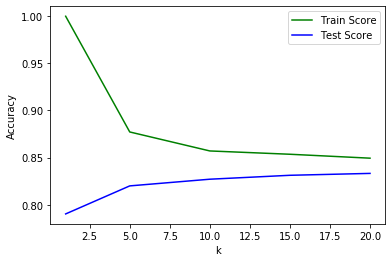

In [54]:
x_axis = [1, 5, 10, 15, 20]
%matplotlib inline
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

In [55]:
#k -1 results in overfitting

knn = KNeighborsClassifier(1)
knn.fit(X_train, y_train)
print('Train score: {:.4f}'.format(knn.score(X_train, y_train)))
print('Test score: {:.4f}'.format(knn.score(X_test, y_test)))

Train score: 0.9994
Test score: 0.7904


In [56]:
knn = KNeighborsClassifier(5)
knn.fit(X_train, y_train)
print('Train score: {:.4f}'.format(knn.score(X_train, y_train)))
print('Test score: {:.4f}'.format(knn.score(X_test, y_test)))

Train score: 0.8771
Test score: 0.8201


In [57]:
knn = KNeighborsClassifier(10)
knn.fit(X_train, y_train)
print('Train score: {:.4f}'.format(knn.score(X_train, y_train)))
print('Test score: {:.4f}'.format(knn.score(X_test, y_test)))

Train score: 0.8570
Test score: 0.8271


In [58]:
knn = KNeighborsClassifier(15)
knn.fit(X_train, y_train)
print('Train score: {:.4f}'.format(knn.score(X_train, y_train)))
print('Test score: {:.4f}'.format(knn.score(X_test, y_test)))

Train score: 0.8535
Test score: 0.8313


In [59]:
knn = KNeighborsClassifier(20)
knn.fit(X_train, y_train)
print('Train score: {:.4f}'.format(knn.score(X_train, y_train)))
print('Test score: {:.4f}'.format(knn.score(X_test, y_test)))

Train score: 0.8494
Test score: 0.8333


In [60]:
pip install mlxtend 

Note: you may need to restart the kernel to use updated packages.


In [61]:
#Logistic Regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [62]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [63]:
X.head()

,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,Divorced,Married-AF-spouse,Married-civ-spouse,...,Not-in-family,Other-relative,Own-child,Unmarried,Wife,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
0,39,77516,13,0,2174,0,40,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,50,83311,13,0,0,0,13,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,38,215646,9,0,0,0,40,1,0,0,...,1,0,0,0,0,0,0,0,0,1
3,53,234721,7,0,0,0,40,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,1,0,0,40,0,0,1,...,0,0,0,0,1,0,0,1,0,0


In [64]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: Salary, Length: 32561, dtype: int64

In [65]:
y.sum()/len(y)

0.2408095574460244

In [66]:
from sklearn.linear_model import LogisticRegression

c_range = [0.1, 1, 10]
penalty = ['l1', 'l2']

train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', C = c, solver='liblinear')
    log_l2 = LogisticRegression(penalty = 'l2', C = c,solver='liblinear')
    log_l1.fit(X_train, y_train)
    log_l2.fit(X_train, y_train)
    train_score_l1.append(log_l1.score(X_train, y_train))
    train_score_l2.append(log_l2.score(X_train, y_train))
    test_score_l1.append(log_l1.score(X_test, y_test))
    test_score_l2.append(log_l2.score(X_test, y_test))

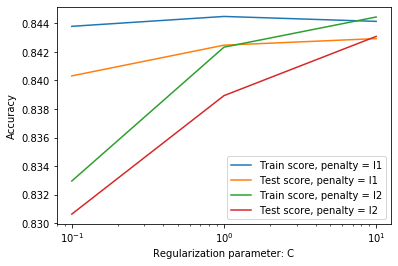

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_range, test_score_l1, label = 'Test score, penalty = l1')
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, test_score_l2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

In [68]:
log1 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set accuracy: {:.3f}".format(log1.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(log1.score(X_test, y_test)))

Training set accuracy: 0.826
Test set accuracy: 0.820


In [76]:
log1 = LogisticRegression(C=1).fit(X_train, y_train)
print("Training set accuracy: {:.3f}".format(log1.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(log1.score(X_test, y_test)))

Training set accuracy: 0.839
Test set accuracy: 0.842


C:\Users\saira\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [77]:
log1 = LogisticRegression(C=10).fit(X_train, y_train)
print("Training set accuracy: {:.3f}".format(log1.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(log1.score(X_test, y_test)))

Training set accuracy: 0.842
Test set accuracy: 0.847


C:\Users\saira\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [69]:
#Decision Tree

%matplotlib notebook
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree

y = data['Salary']
X = data.drop(['Salary'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 0,test_size = 0.4)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

dtree = DecisionTreeClassifier()

dtree.fit(X_train, y_train)
pred = dtree.predict(X_test)

print("Accuracy on training set: {:.3f}".format(dtree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test, y_test)))

Accuracy on training set: 0.999
Accuracy on test set: 0.808


In [70]:
dtree = DecisionTreeClassifier(max_depth=1, random_state=0)
dtree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(dtree.score(X_train, y_train))) 
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test, y_test)))

Accuracy on training set: 0.760
Accuracy on test set: 0.758


In [71]:
dtree = DecisionTreeClassifier(max_depth=2, random_state=0)
dtree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(dtree.score(X_train, y_train))) 
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test, y_test)))

Accuracy on training set: 0.827
Accuracy on test set: 0.831


In [72]:
dtree = DecisionTreeClassifier(max_depth=3, random_state=0)
dtree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(dtree.score(X_train, y_train))) 
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test, y_test)))

Accuracy on training set: 0.842
Accuracy on test set: 0.846


In [73]:
dtree = DecisionTreeClassifier(max_depth=5, random_state=0)
dtree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(dtree.score(X_train, y_train))) 
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test, y_test)))

Accuracy on training set: 0.854
Accuracy on test set: 0.856


In [74]:
dtree = DecisionTreeClassifier(max_depth=10, random_state=0)
dtree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(dtree.score(X_train, y_train))) 
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test, y_test)))

Accuracy on training set: 0.868
Accuracy on test set: 0.854


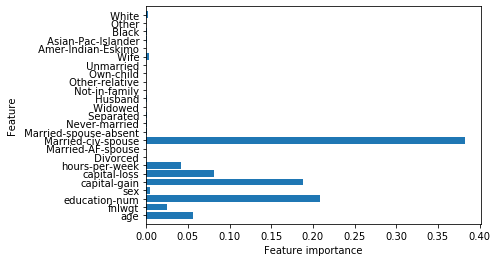

In [75]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
def feature_importances(model):
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

feature_importances(dtree)

In [81]:
#SVC
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)


print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.84
Accuracy on test set: 0.84


In [82]:
svc = SVC(C=0.01,kernel='linear')
svc.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(
    svc.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.801
Accuracy on test set: 0.801


In [83]:
svc = SVC(C=0.1,kernel='linear')
svc.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(
    svc.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.832
Accuracy on test set: 0.834


In [84]:
svc = SVC(C=10,kernel='linear')
svc.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(
    svc.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.843
Accuracy on test set: 0.847
